# L5 Process Inputs: Chaining Prompts


## Setup
#### Load the API key and relevant Python libaries.
In this course, we've provided some code that loads the OpenAI API key for you.

In [ ]:
import os
import openai
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

In [ ]:
def get_completion_from_messages(messages, 
                                 model="gpt-3.5-turbo", 
                                 temperature=0, 
                                 max_tokens=500):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, 
        max_tokens=max_tokens, 
    )
    return response.choices[0].message["content"]

## Implement a complex task with multiple prompts

### Extract relevant product and category names

In [ ]:
delimiter = "####"
system_message = f"""
You will be provided with customer service queries. \
The customer service query will be delimited with \
{delimiter} characters.
Output a python list of objects, where each object has \
the following format:
    'category': <one of Computers and Laptops, \
    Smartphones and Accessories, \
    Televisions and Home Theater Systems, \
    Gaming Consoles and Accessories, 
    Audio Equipment, Cameras and Camcorders>,
OR
    'products': <a list of products that must \
    be found in the allowed products below>

Where the categories and products must be found in \
the customer service query.
If a product is mentioned, it must be associated with \
the correct category in the allowed products list below.
If no products or categories are found, output an \
empty list.

Allowed products: 

Computers and Laptops category:
TechPro Ultrabook
BlueWave Gaming Laptop
PowerLite Convertible
TechPro Desktop
BlueWave Chromebook

Smartphones and Accessories category:
SmartX ProPhone
MobiTech PowerCase
SmartX MiniPhone
MobiTech Wireless Charger
SmartX EarBuds

Televisions and Home Theater Systems category:
CineView 4K TV
SoundMax Home Theater
CineView 8K TV
SoundMax Soundbar
CineView OLED TV

Gaming Consoles and Accessories category:
GameSphere X
ProGamer Controller
GameSphere Y
ProGamer Racing Wheel
GameSphere VR Headset

Audio Equipment category:
AudioPhonic Noise-Canceling Headphones
WaveSound Bluetooth Speaker
AudioPhonic True Wireless Earbuds
WaveSound Soundbar
AudioPhonic Turntable

Cameras and Camcorders category:
FotoSnap DSLR Camera
ActionCam 4K
FotoSnap Mirrorless Camera
ZoomMaster Camcorder
FotoSnap Instant Camera

Only output the list of objects, with nothing else.
"""
user_message_1 = f"""
 tell me about the smartx pro phone and \
 the fotosnap camera, the dslr one. \
 Also tell me about your tvs """
messages =  [  
{'role':'system', 
 'content': system_message},    
{'role':'user', 
 'content': f"{delimiter}{user_message_1}{delimiter}"},  
] 
category_and_product_response_1 = get_completion_from_messages(messages)
print(category_and_product_response_1)

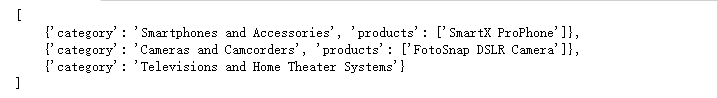

In [ ]:
user_message_2 = f"""
my router isn't working"""
messages =  [  
{'role':'system',
 'content': system_message},    
{'role':'user',
 'content': f"{delimiter}{user_message_2}{delimiter}"},  
] 
response = get_completion_from_messages(messages)
print(response)

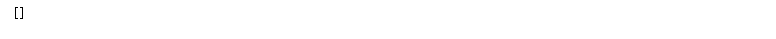

### Retrieve detailed product information for extracted products and categories

In [ ]:
# product information
products = {
    "TechPro Ultrabook": {
        "name": "TechPro Ultrabook",
        "category": "Computers and Laptops",
        "brand": "TechPro",
        "model_number": "TP-UB100",
        "warranty": "1 year",
        "rating": 4.5,
        "features": ["13.3-inch display", "8GB RAM", "256GB SSD", "Intel Core i5 processor"],
        "description": "A sleek and lightweight ultrabook for everyday use.",
        "price": 799.99
    },
    "BlueWave Gaming Laptop": {
        "name": "BlueWave Gaming Laptop",
        "category": "Computers and Laptops",
        "brand": "BlueWave",
        "model_number": "BW-GL200",
        "warranty": "2 years",
        "rating": 4.7,
        "features": ["15.6-inch display", "16GB RAM", "512GB SSD", "NVIDIA GeForce RTX 3060"],
        "description": "A high-performance gaming laptop for an immersive experience.",
        "price": 1199.99
    },
    "PowerLite Convertible": {
        "name": "PowerLite Convertible",
        "category": "Computers and Laptops",
        "brand": "PowerLite",
        "model_number": "PL-CV300",
        "warranty": "1 year",
        "rating": 4.3,
        "features": ["14-inch touchscreen", "8GB RAM", "256GB SSD", "360-degree hinge"],
        "description": "A versatile convertible laptop with a responsive touchscreen.",
        "price": 699.99
    },
    "TechPro Desktop": {
        "name": "TechPro Desktop",
        "category": "Computers and Laptops",
        "brand": "TechPro",
        "model_number": "TP-DT500",
        "warranty": "1 year",
        "rating": 4.4,
        "features": ["Intel Core i7 processor", "16GB RAM", "1TB HDD", "NVIDIA GeForce GTX 1660"],
        "description": "A powerful desktop computer for work and play.",
        "price": 999.99
    },
    "BlueWave Chromebook": {
        "name": "BlueWave Chromebook",
        "category": "Computers and Laptops",
        "brand": "BlueWave",
        "model_number": "BW-CB100",
        "warranty": "1 year",
        "rating": 4.1,
        "features": ["11.6-inch display", "4GB RAM", "32GB eMMC", "Chrome OS"],
        "description": "A compact and affordable Chromebook for everyday tasks.",
        "price": 249.99
    },
    "SmartX ProPhone": {
        "name": "SmartX ProPhone",
        "category": "Smartphones and Accessories",
        "brand": "SmartX",
        "model_number": "SX-PP10",
        "warranty": "1 year",
        "rating": 4.6,
        "features": ["6.1-inch display", "128GB storage", "12MP dual camera", "5G"],
        "description": "A powerful smartphone with advanced camera features.",
        "price": 899.99
    },
    "MobiTech PowerCase": {
        "name": "MobiTech PowerCase",
        "category": "Smartphones and Accessories",
        "brand": "MobiTech",
        "model_number": "MT-PC20",
        "warranty": "1 year",
        "rating": 4.3,
        "features": ["5000mAh battery", "Wireless charging", "Compatible with SmartX ProPhone"],
        "description": "A protective case with built-in battery for extended usage.",
        "price": 59.99
    },
    "SmartX MiniPhone": {
        "name": "SmartX MiniPhone",
        "category": "Smartphones and Accessories",
        "brand": "SmartX",
        "model_number": "SX-MP5",
        "warranty": "1 year",
        "rating": 4.2,
        "features": ["4.7-inch display", "64GB storage", "8MP camera", "4G"],
        "description": "A compact and affordable smartphone for basic tasks.",
        "price": 399.99
    },
    "MobiTech Wireless Charger": {
        "name": "MobiTech Wireless Charger",
        "category": "Smartphones and Accessories",
        "brand": "MobiTech",
        "model_number": "MT-WC10",
        "warranty": "1 year",
        "rating": 4.5,
        "features": ["10W fast charging", "Qi-compatible", "LED indicator", "Compact design"],
        "description": "A convenient wireless charger for a clutter-free workspace.",
        "price": 29.99
    },
    "SmartX EarBuds": {
        "name": "SmartX EarBuds",
        "category": "Smartphones and Accessories",
        "brand": "SmartX",
        "model_number": "SX-EB20",
        "warranty": "1 year",
        "rating": 4.4,
        "features": ["True wireless", "Bluetooth 5.0", "Touch controls", "24-hour battery life"],
        "description": "Experience true wireless freedom with these comfortable earbuds.",
        "price": 99.99
    },

    "CineView 4K TV": {
        "name": "CineView 4K TV",
        "category": "Televisions and Home Theater Systems",
        "brand": "CineView",
        "model_number": "CV-4K55",
        "warranty": "2 years",
        "rating": 4.8,
        "features": ["55-inch display", "4K resolution", "HDR", "Smart TV"],
        "description": "A stunning 4K TV with vibrant colors and smart features.",
        "price": 599.99
    },
    "SoundMax Home Theater": {
        "name": "SoundMax Home Theater",
        "category": "Televisions and Home Theater Systems",
        "brand": "SoundMax",
        "model_number": "SM-HT100",
        "warranty": "1 year",
        "rating": 4.4,
        "features": ["5.1 channel", "1000W output", "Wireless subwoofer", "Bluetooth"],
        "description": "A powerful home theater system for an immersive audio experience.",
        "price": 399.99
    },
    "CineView 8K TV": {
        "name": "CineView 8K TV",
        "category": "Televisions and Home Theater Systems",
        "brand": "CineView",
        "model_number": "CV-8K65",
        "warranty": "2 years",
        "rating": 4.9,
        "features": ["65-inch display", "8K resolution", "HDR", "Smart TV"],
        "description": "Experience the future of television with this stunning 8K TV.",
        "price": 2999.99
    },
    "SoundMax Soundbar": {
        "name": "SoundMax Soundbar",
        "category": "Televisions and Home Theater Systems",
        "brand": "SoundMax",
        "model_number": "SM-SB50",
        "warranty": "1 year",
        "rating": 4.3,
        "features": ["2.1 channel", "300W output", "Wireless subwoofer", "Bluetooth"],
        "description": "Upgrade your TV's audio with this sleek and powerful soundbar.",
        "price": 199.99
    },
    "CineView OLED TV": {
        "name": "CineView OLED TV",
        "category": "Televisions and Home Theater Systems",
        "brand": "CineView",
        "model_number": "CV-OLED55",
        "warranty": "2 years",
        "rating": 4.7,
        "features": ["55-inch display", "4K resolution", "HDR", "Smart TV"],
        "description": "Experience true blacks and vibrant colors with this OLED TV.",
        "price": 1499.99
    },

    "GameSphere X": {
        "name": "GameSphere X",
        "category": "Gaming Consoles and Accessories",
        "brand": "GameSphere",
        "model_number": "GS-X",
        "warranty": "1 year",
        "rating": 4.9,
        "features": ["4K gaming", "1TB storage", "Backward compatibility", "Online multiplayer"],
        "description": "A next-generation gaming console for the ultimate gaming experience.",
        "price": 499.99
    },
    "ProGamer Controller": {
        "name": "ProGamer Controller",
        "category": "Gaming Consoles and Accessories",
        "brand": "ProGamer",
        "model_number": "PG-C100",
        "warranty": "1 year",
        "rating": 4.2,
        "features": ["Ergonomic design", "Customizable buttons", "Wireless", "Rechargeable battery"],
        "description": "A high-quality gaming controller for precision and comfort.",
        "price": 59.99
    },
    "GameSphere Y": {
        "name": "GameSphere Y",
        "category": "Gaming Consoles and Accessories",
        "brand": "GameSphere",
        "model_number": "GS-Y",
        "warranty": "1 year",
        "rating": 4.8,
        "features": ["4K gaming", "500GB storage", "Backward compatibility", "Online multiplayer"],
        "description": "A compact gaming console with powerful performance.",
        "price": 399.99
    },
    "ProGamer Racing Wheel": {
        "name": "ProGamer Racing Wheel",
        "category": "Gaming Consoles and Accessories",
        "brand": "ProGamer",
        "model_number": "PG-RW200",
        "warranty": "1 year",
        "rating": 4.5,
        "features": ["Force feedback", "Adjustable pedals", "Paddle shifters", "Compatible with GameSphere X"],
        "description": "Enhance your racing games with this realistic racing wheel.",
        "price": 249.99
    },
    "GameSphere VR Headset": {
        "name": "GameSphere VR Headset",
        "category": "Gaming Consoles and Accessories",
        "brand": "GameSphere",
        "model_number": "GS-VR",
        "warranty": "1 year",
        "rating": 4.6,
        "features": ["Immersive VR experience", "Built-in headphones", "Adjustable headband", "Compatible with GameSphere X"],
        "description": "Step into the world of virtual reality with this comfortable VR headset.",
        "price": 299.99
    },

    "AudioPhonic Noise-Canceling Headphones": {
        "name": "AudioPhonic Noise-Canceling Headphones",
        "category": "Audio Equipment",
        "brand": "AudioPhonic",
        "model_number": "AP-NC100",
        "warranty": "1 year",
        "rating": 4.6,
        "features": ["Active noise-canceling", "Bluetooth", "20-hour battery life", "Comfortable fit"],
        "description": "Experience immersive sound with these noise-canceling headphones.",
        "price": 199.99
    },
    "WaveSound Bluetooth Speaker": {
        "name": "WaveSound Bluetooth Speaker",
        "category": "Audio Equipment",
        "brand": "WaveSound",
        "model_number": "WS-BS50",
        "warranty": "1 year",
        "rating": 4.5,
        "features": ["Portable", "10-hour battery life", "Water-resistant", "Built-in microphone"],
        "description": "A compact and versatile Bluetooth speaker for music on the go.",
        "price": 49.99
    },
    "AudioPhonic True Wireless Earbuds": {
        "name": "AudioPhonic True Wireless Earbuds",
        "category": "Audio Equipment",
        "brand": "AudioPhonic",
        "model_number": "AP-TW20",
        "warranty": "1 year",
        "rating": 4.4,
        "features": ["True wireless", "Bluetooth 5.0", "Touch controls", "18-hour battery life"],
        "description": "Enjoy music without wires with these comfortable true wireless earbuds.",
        "price": 79.99
    },
    "WaveSound Soundbar": {
        "name": "WaveSound Soundbar",
        "category": "Audio Equipment",
        "brand": "WaveSound",
        "model_number": "WS-SB40",
        "warranty": "1 year",
        "rating": 4.3,
        "features": ["2.0 channel", "80W output", "Bluetooth", "Wall-mountable"],
        "description": "Upgrade your TV's audio with this slim and powerful soundbar.",
        "price": 99.99
    },
    "AudioPhonic Turntable": {
        "name": "AudioPhonic Turntable",
        "category": "Audio Equipment",
        "brand": "AudioPhonic",
        "model_number": "AP-TT10",
        "warranty": "1 year",
        "rating": 4.2,
        "features": ["3-speed", "Built-in speakers", "Bluetooth", "USB recording"],
        "description": "Rediscover your vinyl collection with this modern turntable.",
        "price": 149.99
    },

    "FotoSnap DSLR Camera": {
        "name": "FotoSnap DSLR Camera",
        "category": "Cameras and Camcorders",
        "brand": "FotoSnap",
        "model_number": "FS-DSLR200",
        "warranty": "1 year",
        "rating": 4.7,
        "features": ["24.2MP sensor", "1080p video", "3-inch LCD", "Interchangeable lenses"],
        "description": "Capture stunning photos and videos with this versatile DSLR camera.",
        "price": 599.99
    },
    "ActionCam 4K": {
        "name": "ActionCam 4K",
        "category": "Cameras and Camcorders",
        "brand": "ActionCam",
        "model_number": "AC-4K",
        "warranty": "1 year",
        "rating": 4.4,
        "features": ["4K video", "Waterproof", "Image stabilization", "Wi-Fi"],
        "description": "Record your adventures with this rugged and compact 4K action camera.",
        "price": 299.99
    },
    "FotoSnap Mirrorless Camera": {
        "name": "FotoSnap Mirrorless Camera",
        "category": "Cameras and Camcorders",
        "brand": "FotoSnap",
        "model_number": "FS-ML100",
        "warranty": "1 year",
        "rating": 4.6,
        "features": ["20.1MP sensor", "4K video", "3-inch touchscreen", "Interchangeable lenses"],
        "description": "A compact and lightweight mirrorless camera with advanced features.",
        "price": 799.99
    },
    "ZoomMaster Camcorder": {
        "name": "ZoomMaster Camcorder",
        "category": "Cameras and Camcorders",
        "brand": "ZoomMaster",
        "model_number": "ZM-CM50",
        "warranty": "1 year",
        "rating": 4.3,
        "features": ["1080p video", "30x optical zoom", "3-inch LCD", "Image stabilization"],
        "description": "Capture life's moments with this easy-to-use camcorder.",
        "price": 249.99
    },
    "FotoSnap Instant Camera": {
        "name": "FotoSnap Instant Camera",
        "category": "Cameras and Camcorders",
        "brand": "FotoSnap",
        "model_number": "FS-IC10",
        "warranty": "1 year",
        "rating": 4.1,
        "features": ["Instant prints", "Built-in flash", "Selfie mirror", "Battery-powered"],
        "description": "Create instant memories with this fun and portable instant camera.",
        "price": 69.99
    }
}

In [ ]:
def get_product_by_name(name):
    return products.get(name, None)

def get_products_by_category(category):
    return [product for product in products.values() if product["category"] == category]

In [ ]:
print(get_product_by_name("TechPro Ultrabook"))

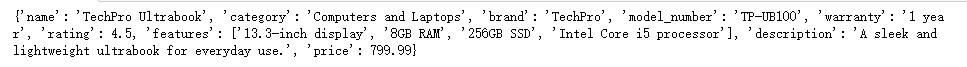

In [ ]:
print(get_products_by_category("Computers and Laptops"))

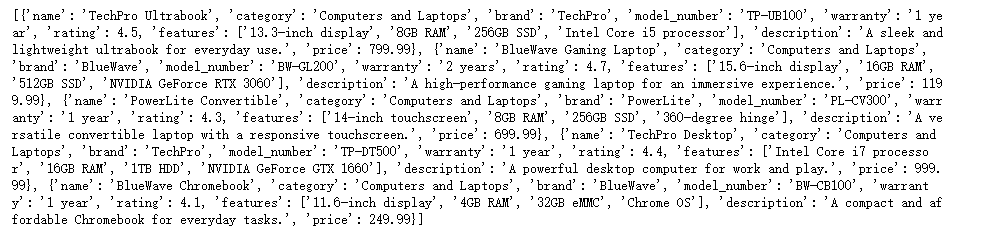

In [ ]:
print(user_message_1)

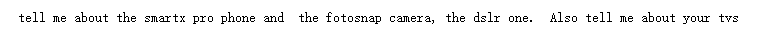

In [ ]:
print(category_and_product_response_1)

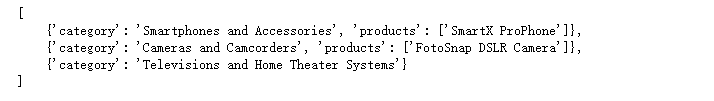

### Read Python string into Python list of dictionaries

In [ ]:
import json 

def read_string_to_list(input_string):
    if input_string is None:
        return None

    try:
        input_string = input_string.replace("'", "\"")  # Replace single quotes with double quotes for valid JSON
        data = json.loads(input_string)
        return data
    except json.JSONDecodeError:
        print("Error: Invalid JSON string")
        return None   
    

In [ ]:
category_and_product_list = read_string_to_list(category_and_product_response_1)
print(category_and_product_list)

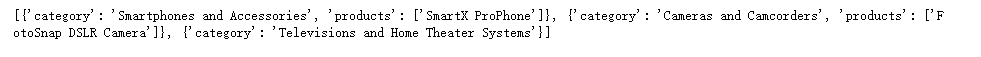

#### Retrieve detailed product information for the relevant products and categories

In [ ]:
def generate_output_string(data_list):
    output_string = ""

    if data_list is None:
        return output_string

    for data in data_list:
        try:
            if "products" in data:
                products_list = data["products"]
                for product_name in products_list:
                    product = get_product_by_name(product_name)
                    if product:
                        output_string += json.dumps(product, indent=4) + "\n"
                    else:
                        print(f"Error: Product '{product_name}' not found")
            elif "category" in data:
                category_name = data["category"]
                category_products = get_products_by_category(category_name)
                for product in category_products:
                    output_string += json.dumps(product, indent=4) + "\n"
            else:
                print("Error: Invalid object format")
        except Exception as e:
            print(f"Error: {e}")

    return output_string 

In [ ]:
product_information_for_user_message_1 = generate_output_string(category_and_product_list)
print(product_information_for_user_message_1)

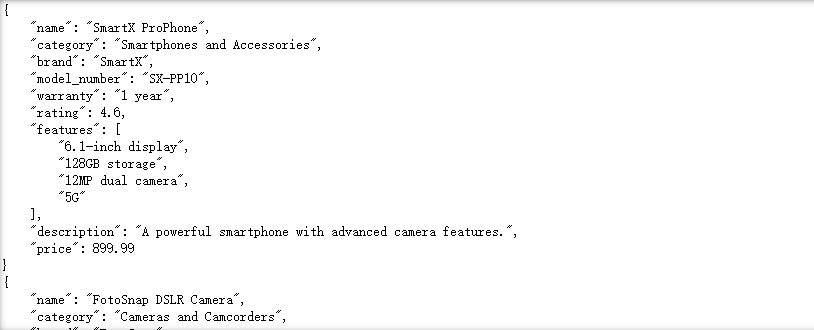
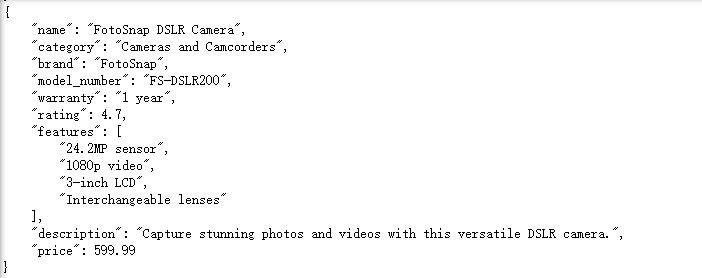

### Generate answer to user query based on detailed product information

In [ ]:
system_message = f"""
You are a customer service assistant for a \
large electronic store. \
Respond in a friendly and helpful tone, \
with very concise answers. \
Make sure to ask the user relevant follow up questions.
"""
user_message_1 = f"""
tell me about the smartx pro phone and \
the fotosnap camera, the dslr one. \
Also tell me about your tvs"""
messages =  [  
{'role':'system',
 'content': system_message},   
{'role':'user',
 'content': user_message_1},  
{'role':'assistant',
 'content': f"""Relevant product information:\n\
 {product_information_for_user_message_1}"""},   
]
final_response = get_completion_from_messages(messages)
print(final_response)

system_message is the instruction, user_message_1 is the requirements from the user, when role='assistant', that means the system need to meet all requirements from the user based on the assistant messages which in this case is a lot of json objects.

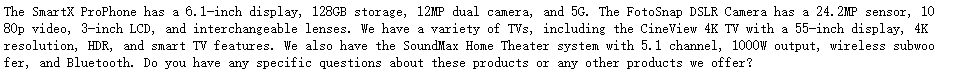